<!--NAVIGATION-->
<  [Scikit-Learn Library](5-Scikit-Learn_Library.ipynb) | [Contents](0-Index.ipynb) | [Classification Analysis](7-Classification_Analysis.ipynb) >

# 6  Regressão Linear


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/computational-chemical-biology/DataScience/blob/master/6-Regression_Analysis.ipynb)

 <a id="top"></a> <br>
**Conteúdo do *Notebook***
1. [Introdução à Regressão Linear](#1)
    1. [Estimando os parâmetros do modelo de regressão](#11)
2. [Explorando os dados antes de ajustar o modelo](#2)
3. [Ajustando um modelo de regressão linear simples](#3)
    1. [Teste de hipóteses para os regressores](#32)
    1. [Medindo o ajuste do modelo](#33)
4. [Ajustando um modelo de regressão linear múltipla](#4)    
5. [Regressão Linear com a biblioteca Scikit-Learn](#5)
6. [Regressão Linear com variáveis preditoras categóricas](#6)
7. [Regressão na forma matricial](#7)
8. [Referências](#8)

<a id="1"></a> <br>
# 1 - Introdução à Regressão Linear

Como visto anteriormente, a regressão linear é útil para predição de uma resposta quantitativa. Os conceitos introduzidos na análise de regressão podem ser generalizados para técnicas mais complexas, estudadas nas seções posteriores. A regressão linear tem por objetivo a predição de uma resposta quantitativa Y, com base em um conjunto de variáveis preditoras X <cite data-cite="236589/MJERACZD"></cite>. O modelo assume que existe uma resposta aproximadamente linear entre X e Y. Podemos expressar uma regressão linear da seguinte forma:

$y = \beta_0 + \beta_1x$

onde $y$ representa a variável resposta, que se prentende predizer, $x$ as características (também conhecidas como variáveis preditoras ou dependentes), $\beta_0$ é o intercepto da regressão e $\beta_1$ é o coeficiente para $x$.

A seguir veremos como estimar modelos de regressão. Utilizaremos as bibliotecas [scikit-learn](http://scikit-learn.org/stable/) e [Statsmodels](http://statsmodels.sourceforge.net/) assim como outras bibliotecas e conceitos de programação apresentados previamente.

<a id="11"></a> <br>
## 1.1 - Estimando os parâmetros do modelo de regressão

Para criar um modelo de regressão, precisamos obter os parâmetros $\beta_0$ e $\beta_1$ de modo que o modelo de regressão se ajuste (*fit*) aos dados observados $y$ da melhor forma possível. Existem várias formas de estimar os parâmetros de um modelo, trabalharemos aqui com o método dos mínimos quadrados. De forma simplificada, seja

$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_i$

o preditor $\hat{y}_i$ do *i*th valor da variável Y com o *i*th da variável X. O método dos mínimos quadrados utiliza o erro dado por:

$e_i = y_i - \hat{y}_i$

onde $y_i$ e $\hat{y}_i$ representam os valores observado e estimado respectivamente, para minimizar a soma dos quadrados dos erros dadas por

$RSS = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

É possível provar <cite data-cite="236589/MJERACZD"></cite> que os valores que minimizam a soma de quadrados dos resíduos (do inglês RSS - *Residual Sum of Squares*) para $\beta_0$ e $\beta_1$ podem ser obtidos por:

$ \hat{\beta}_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x}_i)(y_i - \bar{y}_i)}{\sum_{i=1}^{n}(x_i - \bar{x}_i)^2} $

e 

$ \hat{\beta}_0 = \bar{y}-\hat{\beta}_1\bar{x} $

onde $n$ é o número de observações e $\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$, $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$ são médias amostrais para $y$ e $x$ respectivamente.

A seguir veremos como podemos explorar os dados graficamente e como podemos estimar estes parâmetros. 

<a id="2"></a> <br>
# 2 - Explorando os dados antes de ajustar o modelo

Utilizaremos o que aprendemos em seções anteriores para explorar os dados. Utilizaremos um conjunto de dados públicos de anúncios publicitários descritos em <cite data-cite="236589/MJERACZD"></cite>.

In [1]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# lembre-se de adicionar essa linha para permitir que os gráficos sejam visualizados no notebook
%matplotlib inline

In [2]:
# Sim, é possível ler dados diretamente de uma URL!
dados = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
dados.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Nosso objetivo é predizer a resposta nos baseando em amostras (ou observações), das características: anúncios em TV, Rádio e Jornal (escala de milhares de Dólares). Estas características serão utilizadas para predizer uma variável de interesse (resposta), o número de vendas (escala de milhares de objetos).

In [3]:
# dimensões do DataFrame
dados.shape

(200, 4)

Temos 200 amostras e 3 características, que vamos utilizar para predizer as vendas (*Sales*). Podemos começar visualizando a relação das características e as vendas.

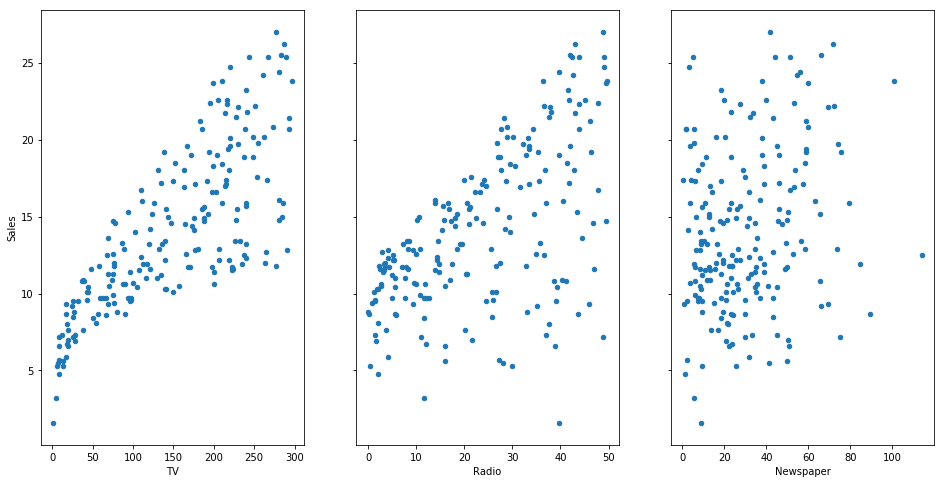

In [4]:
# lembre-se da criação de sub-plots com a biblioteca matplotlib
# aqui criamos três sub-plots em uma linha e compartilhamos o eixo y
# com o parâmetro 'sharey=True'
fig, axs = plt.subplots(1, 3, sharey=True)

# Podemos utilizar o método 'plot' da biblioteca Pandas para adicionar um plot
# a cada elemento da lista de objetos axs
dados.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
dados.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
dados.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

Podemos observar que a variável TV aparenta uma correlação linear mais forte com a variável vendas, a variável Rádio um pouco menor e a variável Jornal (*Newspaper*) aparentemente não está correlacionada. Veremos como podemos explorar essas relações adiante.  

<a id="3"></a> <br>
# 3 - Ajustando um modelo de regressão linear simples

Após observar os dados podemos estimar os parâmetros para o nosso modelo de regressão. Utilizaremos a biblioteca Stasmodels para aplicar o método dos mínimos quadrados visto [acima](#11).

In [5]:
# Utilizaremos a função fórmula, que emula descrição de fórmulas no software R
# que usa o formato 'variável resposta~variável preditora'
import statsmodels.formula.api as smf

# criar um modelo
lm = smf.ols(formula='Sales ~ TV', data=dados)

# ajustar o modelo
lm = lm.fit()

# imprimir o valor estimado para os coeficientes (parâmetros) do modelo
# b_0 = Intercept
# b_1 = relacionado a variável preditora, no caso TV
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

O coeficiente $\beta_1$ pode ser interpretado como o valor adicionado as Vendas (*Sales*), a cada unidade de incremento no valor gasto em anúnicios de TV. Ou seja, a cada unidade adicionada ao valor TV, 0.047537 são adicionadas ao valor de vendas, de acordo com o modelo predito.

Podemos também utilizar o modelo para predizer o valor de vendas no futuro, nos baseando no valor investido em anúncios. Como exemplo, com investimento de **$50,000**, para predizer o número de vendas faríamos:

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [6]:
# Calculando manualmente
7.032594 + 0.047537*50

9.409444

Podemos também utilizar a biblioteca Statsmodels para fazer a predição:

In [7]:
# o valor de entrada para a biblioteca Statsmodels é um objeto DataFrame
X_novo = pd.DataFrame({'TV': [50]})
X_novo.head()

,TV
0,50


In [8]:
# utilize o método 'predict' para realizar a predição
lm.predict(X_novo)

0    9.409426
dtype: float64

Uma forma de vizualizar a reta estimada pelo modelo de regressão, é estimar os valores preditos pelo modelo para Vendas com o menor e o maior valor de anúncios de TV, e então plotar a reta entre estes pontos.

In [9]:
# criar um DataFrame com os valores mínimo e máximo de anúncios de TV
X_novo = pd.DataFrame({'TV': [dados.TV.min(), dados.TV.max()]})
X_novo.head()

,TV
0,0.7
1,296.4


In [10]:
# fazer as predições e armazenar os valores em uma variável
preds = lm.predict(X_novo)
preds

0     7.065869
1    21.122454
dtype: float64

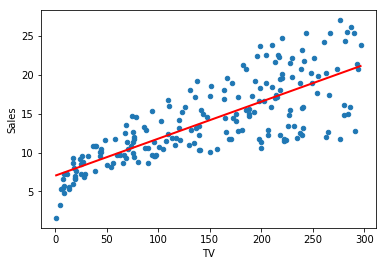

In [11]:
# Plotar os dados observados
dados.plot(kind='scatter', x='TV', y='Sales')

# Plotar uma linha entre os pontos estimados
plt.plot(X_novo, preds, c='red', linewidth=2)

<a id="32"></a> <br>
## 3.2 - Teste de hipóteses para os regressores

Os erros padrão também podem ser utilizados para calcular testes de hipóteses para os coeficientes, o teste mais comum é verificar a hipótese:

$H_0$: *Não existe relacionamento entre X e Y*

contra a hipótese alternativa:

$H_a$: *Existe um relacionamento entre X e Y*,

onde o correspondente matemático seria:

$H_0: \beta_1=0$

contra 

$H_a: \beta_1 \neq 0$

Podemos obter o *valor-p* (*p-value*), primeiro calculando a estatística *t*:

$$ t = \frac{\hat{\beta}-0}{SE(\hat{\beta})} $$

Comparando o valor $t$ calculado a uma distribuição $t$, com o número apropriado de graus de liberdade, pode se obter a probabilidade de se observar um valor igual ou maior que $|t|$, assumindo que $\beta_1=0$. Essa probabilidade é conhecida como *valor-p*.

In [12]:
# Para obter os valores-p dos coeficientes, fazemos
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

<a id="33"></a> <br>
## 3.3 - Medindo o ajuste do modelo

Uma das estatísticas mais utilizadas para medir o ajuste dos modelos de regressão é o $R^2$ (Coeficiente de Determinação) que mede a proporção da variância explicada pelo modelo de regressão. O valor de $R^2$ assume valores entre 0 e 1 e é independente da escala de Y. O Coeficiente de Determinação $R^2$ pode ser calculado como:

$R^2= 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y}_i)^2} $

In [13]:
# Calculando o R2 manualmente
# soma de quadrados dos resíduos (residual sum of squares)
rss = sum((dados['Sales']-lm.predict(dados['TV']))**2)
# soma de quadrados totais (total sum of squares)
tss = sum((dados['Sales']-dados['Sales'].mean())**2)       
# R2
1-rss/tss

0.611875050850071

In [14]:
# acessando o valor pelo modelo ajustado
lm.rsquared

0.611875050850071

<a id="4"></a> <br>
# 4 - Ajustando um modelo de regressão linear múltipla

A regressão linear simples pode ser estendida para múltiplas características, incorporando coeficientes associados a cada característica, assumindo a seguinte forma:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

cada variável $x$ representa uma caracterśtica diferente, e cada característica tem seu coeficiente $\beta$ associado. No presente problema, podemos extender o modelo da seguinte forma:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Vejamos como podemos ajustar um modelo de regressão linear múltipla com a biblioteca Statsmodels.

In [15]:
# criar um modelo com as três características
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=dados).fit()

# imprimir os coeficientes
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

De maneira similar ao modelo com uma característica podemos obter as estatísticas descritas acima para regressão múltipla:

In [16]:
# imprimir estatísticas de ajuste do modelo
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 04 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        13:51:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Alguns pontos interessantes do sumário estatístico acima. Como observado pelo gráfico das características, os valores da variável Jornal (*Newspaper*) não se mostravam correlacionadas aos valores de Vendas (*Sales*). Podemos observar que o valor-p (*p-value*) para *Newspaper* 0.86, é por convenção não significativo (valor-p > 0.05), logo falhamos em rejeitar a hipótese ($\beta_3=0$). O valor do Coeficiente de Determinação ($R^2$) 0.897, é maior que o $R^2$ observado para regressão linear simples (0.612), sendo um indício de que a adição de características contribuiu para descrição de um modelo mais relevante.

<a id="5"></a> <br>
# 5 - Regressão Linear com a biblioteca Scikit-Learn

Como discutido anteriormente, a biblioteca Scikit-Learn possui uma série de implementações eficientes para diferentes algoritmos. Utilizamos a biblioteca Statsmodels até o momento, pois a mesma possui uma interface que permite a ilustração dos conceitos básicos de regressão linear de forma mais transparente. Uma vez que o usuário for familiar com os conceitos, a utilização da biblioteca Scikit-Learn pode ser adotada com as vantagens de eficência e padronização da API.  

In [17]:
# importar as funções para regressão, como visto anteriormente
from sklearn.linear_model import LinearRegression

In [18]:
# criar as entradas com as matrizes X e y
nomes_caracteristicas = ['TV', 'Radio', 'Newspaper']
X = dados[nomes_caracteristicas]
y = dados.Sales
X.shape

(200, 3)

In [19]:
# criar um objeto com as funções para ajuste do modelo
lm = LinearRegression()

# Ajustar o modelo
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# imprimir os coeficientes, lembre-se que atributos são terminados em _
# observe que os coeficientes são idênticos aos calculados acima
print(lm.intercept_)
print(lm.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [21]:
# uma forma simplificada de associar os coeficientes às características
list(zip(nomes_caracteristicas, lm.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820442),
 ('Newspaper', -0.0010374930424763007)]

In [22]:
# lembre-se que nosso modelo possui
# 3 características, logo, para predição, 
# necessitamos de novos valores para as 3 características
lm.predict(pd.DataFrame([100, 25, 25]).T)

array([12.20266701])

In [23]:
# Calcular manualmente
lm.intercept_+(lm.coef_*pd.DataFrame([100, 25, 25]).T).stack().sum()

12.202667011892373

In [24]:
# calcular o R2
lm.score(X, y)

0.8972106381789521

<a id="6"></a> <br>
# 6 - Regressão Linear com preditores categóricos

Até o momento trabalhamos com preditores númericos. Em muitos cenários podemos ter a disposição características categóricas que podem ser utilizadas para análise de regressão.

Vamos criar uma nova característica chamada *Tamanho* (do anúncio), e aleatoriamente atribuir observações como *grande* ou *pequeno*.

In [25]:
import numpy as np

# fixar a semente para garantir a reprodutibilidade
np.random.seed(12345)

# criar uma Series de booleans em que metade sejam True
nums = np.random.rand(len(dados))
molde_grande = nums > 0.5

# iniciar o DataFrame com valores 'pequeno'e substituir a metade por 'grande'
dados['Tamanho'] = 'pequeno'
dados.loc[molde_grande, 'Tamanho'] = 'grande'
dados.head()

,TV,Radio,Newspaper,Sales,Tamanho
1,230.1,37.8,69.2,22.1,grande
2,44.5,39.3,45.1,10.4,pequeno
3,17.2,45.9,69.3,9.3,pequeno
4,151.5,41.3,58.5,18.5,pequeno
5,180.8,10.8,58.4,12.9,grande


Para a biblioteca Scikit-Learn, necessitamos que os dados sejam representados numericamente. Para duas categórias podemos criar valores binários que representem estas categórias.

In [26]:
# criar uma nova Series Egrande
dados['Egrande'] = dados.Tamanho.map({'pequeno':0, 'grande':1})
dados.head()

,TV,Radio,Newspaper,Sales,Tamanho,Egrande
1,230.1,37.8,69.2,22.1,grande,1
2,44.5,39.3,45.1,10.4,pequeno,0
3,17.2,45.9,69.3,9.3,pequeno,0
4,151.5,41.3,58.5,18.5,pequeno,0
5,180.8,10.8,58.4,12.9,grande,1


Podemos recalcular a regressão utilizando como variável adicionando a nova característica codificada por 'Egrande':

In [27]:
# formatar dados de entrada X e y
nomes_caracteristicas = ['TV', 'Radio', 'Newspaper', 'Egrande']
X = dados[nomes_caracteristicas]
y = dados.Sales

# criar o modelo e ajustar
lm = LinearRegression()
lm.fit(X, y)

# imprimir os coeficientes
list(zip(nomes_caracteristicas, lm.coef_))

[('TV', 0.04571982092436276),
 ('Radio', 0.1887281431342785),
 ('Newspaper', -0.0010976794483515406),
 ('Egrande', 0.05742385085482782)]

Como anteriormente, a intepretação do coeficiente para a característica Egrande, segue, que para o valor investido nos anúncios de TV/Rádio/Jornal, ser da categória 'grande' é associado a um incremento de 57.42 unidades (lembre se que as unidades se contam aos milhares) na Venda. Este incremento é dado em comparação ao valor de referência 'pequeno'. Se invertessemos a codificação arbitrária de 1/0, deveríamos obter um coeficiente negativo, veja abaixo:

In [28]:
# criar uma nova Series Egrande
dados['Egrande'] = dados.Tamanho.map({'pequeno':1, 'grande':0})
dados.head()

,TV,Radio,Newspaper,Sales,Tamanho,Egrande
1,230.1,37.8,69.2,22.1,grande,0
2,44.5,39.3,45.1,10.4,pequeno,1
3,17.2,45.9,69.3,9.3,pequeno,1
4,151.5,41.3,58.5,18.5,pequeno,1
5,180.8,10.8,58.4,12.9,grande,0


In [29]:
# formatar dados de entrada X e y
nomes_caracteristicas = ['TV', 'Radio', 'Newspaper', 'Egrande']
X = dados[nomes_caracteristicas]
y = dados.Sales

# criar o modelo e ajustar
lm = LinearRegression()
lm.fit(X, y)

# imprimir os coeficientes
list(zip(nomes_caracteristicas, lm.coef_))

[('TV', 0.04571982092436276),
 ('Radio', 0.18872814313427855),
 ('Newspaper', -0.0010976794483515406),
 ('Egrande', -0.05742385085482793)]

<a id="7"></a> <br>
# 7 - Regressão na forma matricial

Vamos calcular abaixo a forma matricial da regressão <cite data-cite="236589/V399824H"></cite>, como discutido na aula teórica

$$
\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

In [30]:
import numpy as np

X = np.asarray([[3.0,3.0,4.0,0.0],[3.0,3.0,3.0,0.0],[3.0,2.0,2.0,5.0],
[2.0,2.0,4.0,0.0],[3.0,3.0,4.0,4.0],[4.0,4.0,3.0,0.0],
[2.0,2.0,4.0,0.0],[2.0,2.0,2.0,0.0],[3.0,4.0,2.0,5.0],
[2.0,2.0,3.0,0.0],[2.0,4.0,2.0,0.0],[3.0,3.0,3.0,0.0],
[2.0,2.0,4.0,5.0],[4.0,3.0,2.0,6.0],[3.0,4.0,4.0,4.0],
[3.0,2.0,2.0,6.0],[3.0,3.0,3.0,0.0],[3.0,2.0,4.0,0.0],
[3.0,3.0,4.0,4.0],[3.0,4.0,2.0,0.0]])

Y = np.asarray([4.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,
3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0])

In [31]:
X

array([[3., 3., 4., 0.],
       [3., 3., 3., 0.],
       [3., 2., 2., 5.],
       [2., 2., 4., 0.],
       [3., 3., 4., 4.],
       [4., 4., 3., 0.],
       [2., 2., 4., 0.],
       [2., 2., 2., 0.],
       [3., 4., 2., 5.],
       [2., 2., 3., 0.],
       [2., 4., 2., 0.],
       [3., 3., 3., 0.],
       [2., 2., 4., 5.],
       [4., 3., 2., 6.],
       [3., 4., 4., 4.],
       [3., 2., 2., 6.],
       [3., 3., 3., 0.],
       [3., 2., 4., 0.],
       [3., 3., 4., 4.],
       [3., 4., 2., 0.]])

In [32]:
Y

array([4., 3., 2., 3., 3., 4., 3., 2., 3., 3., 3., 3., 2., 2., 3., 2., 3.,
       3., 3., 3.])

In [33]:
def regressao_matriz(X,Y):
    N = len(Y)
    # Lembre-se de adicionar uma coluna
    # de 1s se o modelo inclui beta_0
    X1 = np.hstack((np.ones((N,1)),X))
    # A in inversa da multiplicação X'X-1:
    XX = np.linalg.inv(np.dot(X1.transpose(),X1))
    # A multiplicação X'y:
    Xy = np.dot(X1.transpose(),Y)
    betas = np.dot(XX,Xy)  
    return betas

In [34]:
betas = regressao_matriz(X,Y)
betas

array([ 0.56423213,  0.22205474,  0.34284882,  0.30886232, -0.13083827])

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)
[lm.intercept_, lm.coef_]

[0.5642321263403107,
 array([ 0.22205474,  0.34284882,  0.30886232, -0.13083827])]

<a id="8"></a> <br>
# 8 - Referências

<div class="cite2c-biblio"></div>

###### [Voltar ao topo](#top)

<!--NAVIGATION-->
<  [Scikit-Learn Library](5-Scikit-Learn_Library.ipynb) | [Contents](0-Index.ipynb) | [Classification Analysis](7-Classification_Analysis.ipynb) >